[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Jonarod/Bootcamp-Inteligencia-Artificial-Women-Who-Code-Medellin/blob/master/semana%204/CNN%20deteccion/TFLite%20model%20maker/TFLite_Model_Maker.ipynb)

In [1]:
!pip install -q tflite-model-maker
!pip install -q tflite-support

     |████████████████████████████████| 642 kB 5.4 MB/s 
     |████████████████████████████████| 1.1 MB 46.7 MB/s 
     |████████████████████████████████| 840 kB 42.1 MB/s 
     |████████████████████████████████| 1.2 MB 39.8 MB/s 
     |████████████████████████████████| 10.9 MB 37.7 MB/s 
     |████████████████████████████████| 77 kB 6.3 MB/s 
     |████████████████████████████████| 87 kB 6.7 MB/s 
     |████████████████████████████████| 120 kB 49.5 MB/s 
     |████████████████████████████████| 596 kB 53.7 MB/s 
     |████████████████████████████████| 237 kB 56.6 MB/s 
     |████████████████████████████████| 6.4 MB 36.1 MB/s 
     |████████████████████████████████| 3.4 MB 24.6 MB/s 
     |████████████████████████████████| 42.5 MB 1.8 MB/s 
     |████████████████████████████████| 25.3 MB 1.4 MB/s 
     |████████████████████████████████| 99 kB 10.1 MB/s 
     |████████████████████████████████| 352 kB 28.5 MB/s 
     |████████████████████████████████| 47.8 MB 78 kB/s 
     |██████████████

In [3]:
!pip uninstall opencv-python-headless
!pip install opencv-python-headless==4.1.2.30
!apt-get install libportaudio2

import numpy as np
import pandas as pd

import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display

import os

from tflite_model_maker import model_spec
from tflite_model_maker import object_detector
from tflite_model_maker.config import ExportFormat

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

Found existing installation: opencv-python-headless 4.1.2.30
Uninstalling opencv-python-headless-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.1.2.30.dist-info/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libQtCore-bbdab771.so.4.8.7
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libQtGui-903938cd.so.4.8.7
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libQtTest-1183da5d.so.4.8.7
Proceed (y/n)? y
  Successfully uninstalled opencv-python-headless-4.1.2.30
  Using cached opencv_python_headless-4.1.2.30-cp37-cp37m-manylinux1_x86_64.whl (21.8 MB)


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 64.6 kB of archives.
After this operation, 215 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Fetched 64.6 kB in 0s (230 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 155203 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1_amd64.deb ...
Unpacking libportaudio2:amd64 (19.6.0-1) ...
Setting up libportaudio2:amd64 (19.6.0-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/pyt

In [4]:
!wget https://storage.googleapis.com/download.tensorflow.org/data/android_figurine.zip
!unzip -q android_figurine.zip

--2022-05-13 18:53:51--  https://storage.googleapis.com/download.tensorflow.org/data/android_figurine.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 74.125.69.128, 173.194.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14333895 (14M) [application/zip]
Saving to: ‘android_figurine.zip’

android_figurine.zi 100%[===================>]  13.67M  --.-KB/s    in 0.09s   

2022-05-13 18:53:51 (146 MB/s) - ‘android_figurine.zip’ saved [14333895/14333895]



In [5]:
!ls android_figurine/train/

IMG_0509.jpg  IMG_0521.xml  IMG_0534.jpg  IMG_0546.xml	IMG_0559.jpg
IMG_0509.xml  IMG_0522.jpg  IMG_0534.xml  IMG_0547.jpg	IMG_0559.xml
IMG_0510.jpg  IMG_0522.xml  IMG_0535.jpg  IMG_0547.xml	IMG_0560.jpg
IMG_0510.xml  IMG_0523.jpg  IMG_0535.xml  IMG_0548.jpg	IMG_0560.xml
IMG_0511.jpg  IMG_0523.xml  IMG_0536.jpg  IMG_0548.xml	IMG_0561.jpg
IMG_0511.xml  IMG_0524.jpg  IMG_0536.xml  IMG_0549.jpg	IMG_0561.xml
IMG_0512.jpg  IMG_0524.xml  IMG_0537.jpg  IMG_0549.xml	IMG_0562.jpg
IMG_0512.xml  IMG_0525.jpg  IMG_0537.xml  IMG_0550.jpg	IMG_0562.xml
IMG_0513.jpg  IMG_0525.xml  IMG_0538.jpg  IMG_0550.xml	IMG_0563.jpg
IMG_0513.xml  IMG_0526.jpg  IMG_0538.xml  IMG_0551.jpg	IMG_0563.xml
IMG_0514.jpg  IMG_0526.xml  IMG_0539.jpg  IMG_0551.xml	IMG_0564.jpg
IMG_0514.xml  IMG_0527.jpg  IMG_0539.xml  IMG_0552.jpg	IMG_0564.xml
IMG_0515.jpg  IMG_0527.xml  IMG_0540.jpg  IMG_0552.xml	IMG_0565.jpg
IMG_0515.xml  IMG_0528.jpg  IMG_0540.xml  IMG_0553.jpg	IMG_0565.xml
IMG_0516.jpg  IMG_0528.xml  IMG_0541.jpg  IMG_05

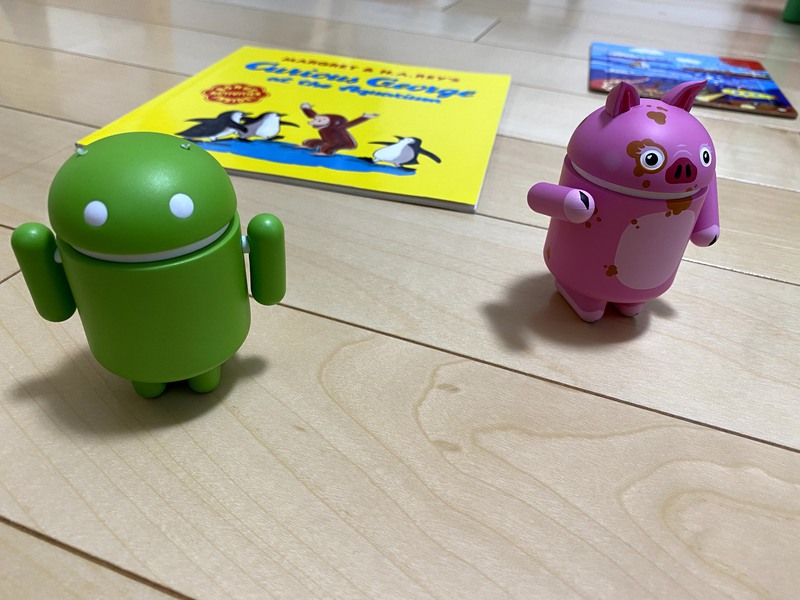

In [6]:
img = cv.imread('android_figurine/train/IMG_0509.jpg', cv.IMREAD_UNCHANGED)
cv2_imshow(img)

In [7]:
train_data = object_detector.DataLoader.from_pascal_voc(
    'android_figurine/train',
    'android_figurine/train',
    ['android', 'pig_android']
)

val_data = object_detector.DataLoader.from_pascal_voc(
    'android_figurine/validate',
    'android_figurine/validate',
    ['android', 'pig_android']
)

In [8]:
spec = model_spec.get('efficientdet_lite0')

In [35]:
model = object_detector.create(train_data, model_spec=spec, train_whole_model=True, batch_size=4,  epochs=20, validation_data=val_data)

Epoch 1/20
15/15 [==============================] - 50s 955ms/step - det_loss: 1.6574 - cls_loss: 1.0826 - box_loss: 0.0115 - reg_l2_loss: 0.0630 - loss: 1.7204 - learning_rate: 0.0065 - gradient_norm: 2.4594 - val_det_loss: 1.4401 - val_cls_loss: 0.9710 - val_box_loss: 0.0094 - val_reg_l2_loss: 0.0630 - val_loss: 1.5031
Epoch 2/20
15/15 [==============================] - 11s 767ms/step - det_loss: 1.3549 - cls_loss: 0.8861 - box_loss: 0.0094 - reg_l2_loss: 0.0630 - loss: 1.4179 - learning_rate: 0.0049 - gradient_norm: 2.7988 - val_det_loss: 1.1925 - val_cls_loss: 0.7973 - val_box_loss: 0.0079 - val_reg_l2_loss: 0.0630 - val_loss: 1.2556
Epoch 3/20
15/15 [==============================] - 11s 759ms/step - det_loss: 1.0084 - cls_loss: 0.6812 - box_loss: 0.0065 - reg_l2_loss: 0.0630 - loss: 1.0714 - learning_rate: 0.0048 - gradient_norm: 2.8864 - val_det_loss: 0.7954 - val_cls_loss: 0.5082 - val_box_loss: 0.0057 - val_reg_l2_loss: 0.0630 - val_loss: 0.8584
Epoch 4/20
15/15 [=============

In [36]:
model.summary()

Model: ""
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  multiple                  3234464   
                                                                 
 class_net/class-predict (Se  multiple                 1746      
 parableConv2D)                                                  
                                                                 
 box_net/box-predict (Separa  multiple                 2916      
 bleConv2D)                                                      
                                                                 
Total params: 3,239,126
Trainable params: 3,191,990
Non-trainable params: 47,136
_________________________________________________________________


In [37]:
model.evaluate(val_data)

1/1 [==============================] - 8s 8s/step



{'AP': 0.8061056,
 'AP50': 1.0,
 'AP75': 1.0,
 'AP_/android': 0.85363036,
 'AP_/pig_android': 0.75858086,
 'APl': 0.8061056,
 'APm': -1.0,
 'APs': -1.0,
 'ARl': 0.8201389,
 'ARm': -1.0,
 'ARmax1': 0.81458336,
 'ARmax10': 0.8201389,
 'ARmax100': 0.8201389,
 'ARs': -1.0}

In [38]:
model.export(export_dir='.', tflite_filename='android_fig.tflite', export_format=ExportFormat.TFLITE)
model.export(export_dir='.', saved_model_filename='android_fig.h5', export_format=ExportFormat.SAVED_MODEL)

In [39]:
!ls

android_fig.h5	    android_figurine	  sample_data
android_fig.tflite  android_figurine.zip


In [40]:
!zip -r android_fig.h5.zip android_fig.h5
from google.colab import files
files.download("android_fig.h5.zip")
files.download("android_fig.tflite")

  adding: android_fig.h5/ (stored 0%)
  adding: android_fig.h5/saved_model.pb (deflated 91%)
  adding: android_fig.h5/assets/ (stored 0%)
  adding: android_fig.h5/variables/ (stored 0%)
  adding: android_fig.h5/variables/variables.index (deflated 84%)
  adding: android_fig.h5/variables/variables.data-00000-of-00001 (deflated 8%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
model.evaluate_tflite('android_fig.tflite', val_data)

10/10 [==============================] - 32s 3s/step



{'AP': 0.8117869,
 'AP50': 1.0,
 'AP75': 1.0,
 'AP_/android': 0.8422442,
 'AP_/pig_android': 0.7813296,
 'APl': 0.8117869,
 'APm': -1.0,
 'APs': -1.0,
 'ARl': 0.83055556,
 'ARm': -1.0,
 'ARmax1': 0.83055556,
 'ARmax10': 0.83055556,
 'ARmax100': 0.83055556,
 'ARs': -1.0}

# Copiar y Pegar Boilerplate Code

In [42]:

import platform
from typing import List, NamedTuple
import json
from tflite_support import metadata

import cv2

Interpreter = tf.lite.Interpreter
load_delegate = tf.lite.experimental.load_delegate

# pylint: enable=g-import-not-at-top


class ObjectDetectorOptions(NamedTuple):
  enable_edgetpu: bool = False
  label_allow_list: List[str] = None
  label_deny_list: List[str] = None
  max_results: int = -1
  num_threads: int = 1
  score_threshold: float = 0.0

class Rect(NamedTuple):
  left: float
  top: float
  right: float
  bottom: float

class Category(NamedTuple):
  label: str
  score: float
  index: int

class Detection(NamedTuple):
  bounding_box: Rect
  categories: List[Category]


def edgetpu_lib_name():
  """Returns the library name of EdgeTPU in the current platform."""
  return {
      'Darwin': 'libedgetpu.1.dylib',
      'Linux': 'libedgetpu.so.1',
      'Windows': 'edgetpu.dll',
  }.get(platform.system(), None)


class ObjectDetector:
  """A wrapper class for a TFLite object detection model."""

  _OUTPUT_LOCATION_NAME = 'location'
  _OUTPUT_CATEGORY_NAME = 'category'
  _OUTPUT_SCORE_NAME = 'score'
  _OUTPUT_NUMBER_NAME = 'number of detections'

  def __init__(
      self,
      model_path: str,
      options: ObjectDetectorOptions = ObjectDetectorOptions()
  ) -> None:
    """Initialize a TFLite object detection model.
    Args:
        model_path: Path to the TFLite model.
        options: The config to initialize an object detector. (Optional)
    Raises:
        ValueError: If the TFLite model is invalid.
        OSError: If the current OS isn't supported by EdgeTPU.
    """

    # Load metadata from model.
    displayer = metadata.MetadataDisplayer.with_model_file(model_path)

    # Save model metadata for preprocessing later.
    model_metadata = json.loads(displayer.get_metadata_json())
    process_units = model_metadata['subgraph_metadata'][0]['input_tensor_metadata'][0]['process_units']
    mean = 0.0
    std = 1.0
    for option in process_units:
      if option['options_type'] == 'NormalizationOptions':
        mean = option['options']['mean'][0]
        std = option['options']['std'][0]
    self._mean = mean
    self._std = std

    # Load label list from metadata.
    file_name = displayer.get_packed_associated_file_list()[0]
    label_map_file = displayer.get_associated_file_buffer(file_name).decode()
    label_list = list(filter(lambda x: len(x) > 0, label_map_file.splitlines()))
    self._label_list = label_list

    # Initialize TFLite model.
    if options.enable_edgetpu:
      if edgetpu_lib_name() is None:
        raise OSError("The current OS isn't supported by Coral EdgeTPU.")
      interpreter = Interpreter(
          model_path=model_path,
          experimental_delegates=[load_delegate(edgetpu_lib_name())],
          num_threads=options.num_threads)
    else:
      interpreter = Interpreter(
          model_path=model_path, num_threads=options.num_threads)

    interpreter.allocate_tensors()
    input_detail = interpreter.get_input_details()[0]

    # From TensorFlow 2.6, the order of the outputs become undefined.
    # Therefore we need to sort the tensor indices of TFLite outputs and to know
    # exactly the meaning of each output tensor. For example, if
    # output indices are [601, 599, 598, 600], tensor names and indices aligned
    # are:
    #   - location: 598
    #   - category: 599
    #   - score: 600
    #   - detection_count: 601
    # because of the op's ports of TFLITE_DETECTION_POST_PROCESS
    # (https://github.com/tensorflow/tensorflow/blob/a4fe268ea084e7d323133ed7b986e0ae259a2bc7/tensorflow/lite/kernels/detection_postprocess.cc#L47-L50).
    sorted_output_indices = sorted(
        [output['index'] for output in interpreter.get_output_details()])
    self._output_indices = {
        self._OUTPUT_LOCATION_NAME: sorted_output_indices[0],
        self._OUTPUT_CATEGORY_NAME: sorted_output_indices[1],
        self._OUTPUT_SCORE_NAME: sorted_output_indices[2],
        self._OUTPUT_NUMBER_NAME: sorted_output_indices[3],
    }

    self._input_size = input_detail['shape'][2], input_detail['shape'][1]
    self._is_quantized_input = input_detail['dtype'] == np.uint8
    self._interpreter = interpreter
    self._options = options

  def detect(self, input_image: np.ndarray) -> List[Detection]:
    """Run detection on an input image.
    Args:
        input_image: A [height, width, 3] RGB image. Note that height and width
          can be anything since the image will be immediately resized according
          to the needs of the model within this function.
    Returns:
        A Person instance.
    """
    image_height, image_width, _ = input_image.shape

    input_tensor = self._preprocess(input_image)

    self._set_input_tensor(input_tensor)
    self._interpreter.invoke()

    # Get all output details
    boxes = self._get_output_tensor(self._OUTPUT_LOCATION_NAME)
    classes = self._get_output_tensor(self._OUTPUT_CATEGORY_NAME)
    scores = self._get_output_tensor(self._OUTPUT_SCORE_NAME)
    count = int(self._get_output_tensor(self._OUTPUT_NUMBER_NAME))

    return self._postprocess(boxes, classes, scores, count, image_width,
                             image_height)

  def _preprocess(self, input_image: np.ndarray) -> np.ndarray:
    """Preprocess the input image as required by the TFLite model."""

    # Resize the input
    input_tensor = cv2.resize(input_image, self._input_size)

    # Normalize the input if it's a float model (aka. not quantized)
    if not self._is_quantized_input:
      input_tensor = (np.float32(input_tensor) - self._mean) / self._std

    # Add batch dimension
    input_tensor = np.expand_dims(input_tensor, axis=0)

    return input_tensor

  def _set_input_tensor(self, image):
    """Sets the input tensor."""
    tensor_index = self._interpreter.get_input_details()[0]['index']
    input_tensor = self._interpreter.tensor(tensor_index)()[0]
    input_tensor[:, :] = image

  def _get_output_tensor(self, name):
    """Returns the output tensor at the given index."""
    output_index = self._output_indices[name]
    tensor = np.squeeze(self._interpreter.get_tensor(output_index))
    return tensor

  def _postprocess(self, boxes: np.ndarray, classes: np.ndarray,
                   scores: np.ndarray, count: int, image_width: int,
                   image_height: int) -> List[Detection]:
    """Post-process the output of TFLite model into a list of Detection objects.
    Args:
        boxes: Bounding boxes of detected objects from the TFLite model.
        classes: Class index of the detected objects from the TFLite model.
        scores: Confidence scores of the detected objects from the TFLite model.
        count: Number of detected objects from the TFLite model.
        image_width: Width of the input image.
        image_height: Height of the input image.
    Returns:
        A list of Detection objects detected by the TFLite model.
    """
    results = []

    # Parse the model output into a list of Detection entities.
    for i in range(count):
      if scores[i] >= self._options.score_threshold:
        y_min, x_min, y_max, x_max = boxes[i]
        bounding_box = Rect(
            top=int(y_min * image_height),
            left=int(x_min * image_width),
            bottom=int(y_max * image_height),
            right=int(x_max * image_width))
        class_id = int(classes[i])
        category = Category(
            score=scores[i],
            label=self._label_list[class_id],  # 0 is reserved for background
            index=class_id)
        result = Detection(bounding_box=bounding_box, categories=[category])
        results.append(result)

    # Sort detection results by score ascending
    sorted_results = sorted(
        results,
        key=lambda detection: detection.categories[0].score,
        reverse=True)

    # Filter out detections in deny list
    filtered_results = sorted_results
    if self._options.label_deny_list is not None:
      filtered_results = list(
          filter(
              lambda detection: detection.categories[0].label not in self.
              _options.label_deny_list, filtered_results))

    # Keep only detections in allow list
    if self._options.label_allow_list is not None:
      filtered_results = list(
          filter(
              lambda detection: detection.categories[0].label in self._options.
              label_allow_list, filtered_results))

    # Only return maximum of max_results detection.
    if self._options.max_results > 0:
      result_count = min(len(filtered_results), self._options.max_results)
      filtered_results = filtered_results[:result_count]

    return filtered_results


_MARGIN = 10  # pixels
_ROW_SIZE = 10  # pixels
_FONT_SIZE = 1
_FONT_THICKNESS = 1
_TEXT_COLOR = (0, 0, 255)  # red


def visualize(
    image: np.ndarray,
    detections: List[Detection],
) -> np.ndarray:
  """Draws bounding boxes on the input image and return it.
  Args:
    image: The input RGB image.
    detections: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  for detection in detections:
    # Draw bounding_box
    start_point = detection.bounding_box.left, detection.bounding_box.top
    end_point = detection.bounding_box.right, detection.bounding_box.bottom
    cv2.rectangle(image, start_point, end_point, _TEXT_COLOR, 3)

    # Draw label and score
    category = detection.categories[0]
    class_name = category.label
    probability = round(category.score, 2)
    result_text = class_name + ' (' + str(probability) + ')'
    text_location = (_MARGIN + detection.bounding_box.left,
                     _MARGIN + _ROW_SIZE + detection.bounding_box.top)
    cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                _FONT_SIZE, _TEXT_COLOR, _FONT_THICKNESS)

  return image

# Inferencia con TFLite

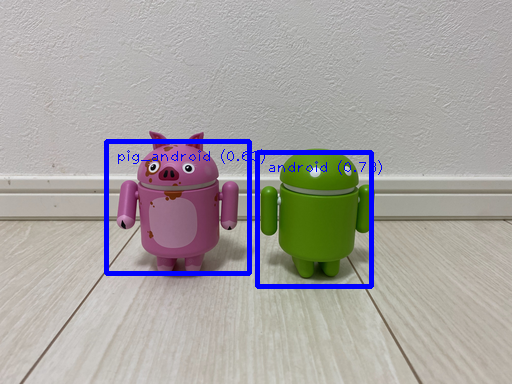

In [43]:
from PIL import Image

INPUT_IMAGE_URL = "http://download.tensorflow.org/example_images/android_figurine.jpg"
DETECTION_THRESHOLD = 0.5
TFLITE_MODEL_PATH = "android_fig.tflite"

TEMP_FILE = '/tmp/image.png'

!wget -q -O $TEMP_FILE $INPUT_IMAGE_URL
image = Image.open(TEMP_FILE).convert('RGB')
image.thumbnail((512, 512), Image.ANTIALIAS)
image_np = np.asarray(image)

# Load the TFLite model
options = ObjectDetectorOptions( num_threads=4, score_threshold=DETECTION_THRESHOLD )
detector = ObjectDetector(model_path=TFLITE_MODEL_PATH, options=options)

# Run object detection estimation using the model.
detections = detector.detect(image_np)

# Draw keypoints and edges on input image
image_np = visualize(image_np, detections)

# Show the detection result
Image.fromarray(image_np)